**Домашнее задание «Случайные марковские процессы»**
​
1.  Скачайте текст произведения «Война и мир»: ссылка на [GitHub](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [Google Drive](https://drive.google.com/drive/u/0/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU).

2.  Очистите его, оставив только русские буквы и символы пробела.

3.  Постройте матрицу переходных вероятностей.

4.  Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

5.  Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

6.  Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.

7.  Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

## Imports

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import urllib.request

## Warning ingrone

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [3]:
#адреса всех книг
book_adress = 'https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/'
book_list = ['tom_1.txt','tom_2.txt','tom_3.txt','tom_4.txt']

In [4]:
# соберем все книги в одну строку

filename = "textfile.txt"   # replace with the desired filename
full_text = ''

# download the file
for book in book_list: 
    book_link  = book_adress+book
    urllib.request.urlretrieve(book_link, filename)

    # open the file
    with open(filename, 'r', encoding="utf8") as f:
        text = f.read()
    text = re.sub('[^абвгдеёжзийклмнопрстуфхцчшщъыьэюя]','', text.lower(), flags=re.UNICODE)
    full_text +=text
    

In [5]:
len(full_text)

2300980

## Построим матрицу переходных вероятностей

In [6]:
RUS = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUS)}

In [7]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [8]:
for cp, cn in zip(full_text[:-1], full_text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [9]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [10]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

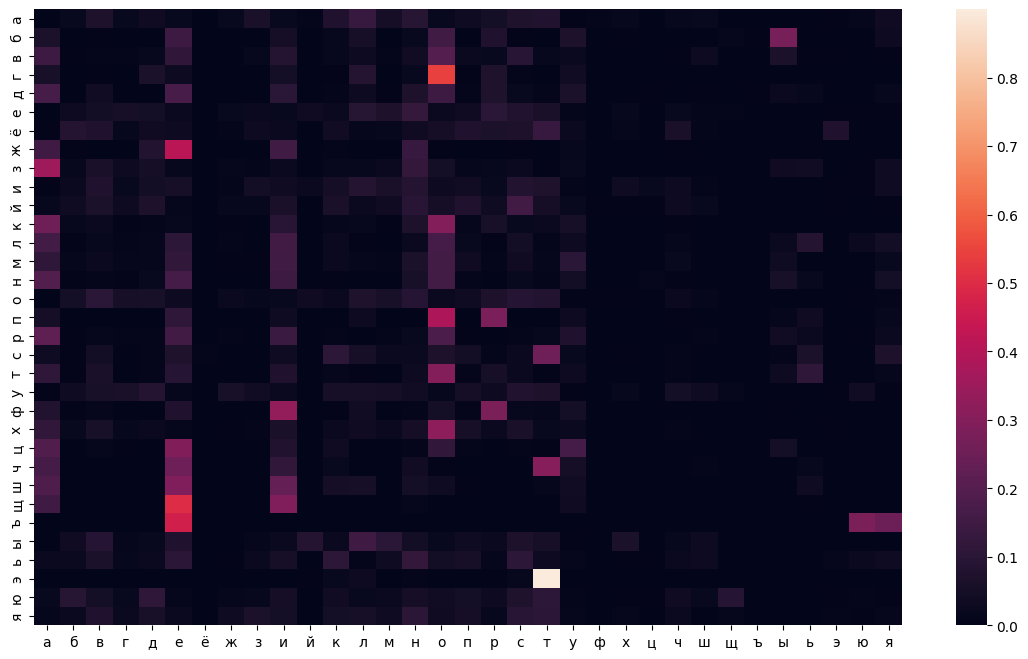

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

## Посчитаем вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [12]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
sum_prob = 0

for c in RUS:
    for g in RUS:
        proba = prior * probabilities[start, POS[c]] * probabilities[
            start, POS[g]] * probabilities[POS[c], end]

        if proba > 1e-5:
            print(''.join(['п', c, g, 'р']), proba)
        sum_prob += proba

print(sum_prob)


паор 2.8707064955238198e-05
парр 2.0750892102526067e-05
пеар 1.7167072698556322e-05
пеер 3.629188971057571e-05
пеир 1.1124786628035227e-05
пелр 1.0432214127172253e-05
пеор 0.00012699162068973352
перр 9.179584966162597e-05
пеьр 1.2417225074527558e-05
поар 4.146255695503161e-05
поер 8.765353130105951e-05
поир 2.6869001330452502e-05
полр 2.5196274286841e-05
поор 0.00030671491861874875
порр 0.00022170877421348378
поур 2.337866537331039e-05
поьр 2.9990547073255077e-05
пояр 1.1761773621614747e-05
пуор 1.050658162277306e-05
0.001326193109704395


## Сгенерируем слово, начинающееся с буквы «Б» длиной восемь символов.

In [13]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бокедамив


## Оценим временной ряд через HMM


In [14]:
# Загрузим данные
df = pd.read_csv('Series\weekly-closings-of-the-dowjones-.csv',
                 parse_dates=[0],
                 index_col=0)

series = df.reset_index().iloc[:, -1]
values = series.values.reshape(-1,1)

In [15]:
from hmmlearn import hmm

for n in range(1, 16):
    model = hmm.GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582102
2 -820.6339389833486
3 -786.8339980379204
4 -786.2213864007217
5 -768.0805220514607
6 -738.1247154800651
7 -742.5484112424264
8 -720.7650396821316


Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.


9 -720.3544936535806
10 -751.9214264999204
11 -738.479495276453


Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 162 data points will result in a degenerate solution.


12 -714.0099394842368
13 -706.4395916921338


Fitting a model with 254 free scalar parameters with only 162 data points will result in a degenerate solution.


14 -685.3420554895004
15 -686.7691197294193


Fitting a model with 254 free scalar parameters with only 162 data points will result in a degenerate solution.


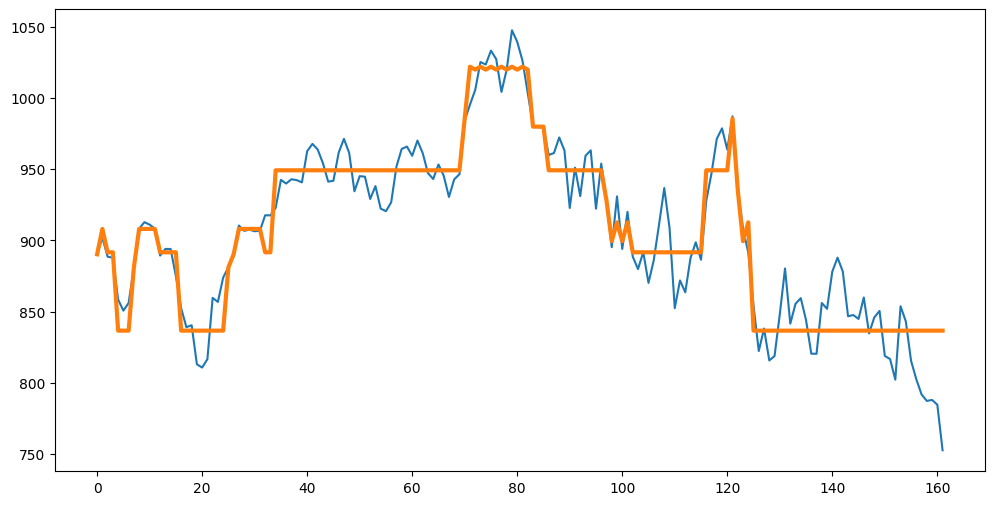

In [16]:
# количество компонент = 15

model = hmm.GaussianHMM(n_components=15,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

## Построим через среднее каждой компоненты наивный прогноз ряда.

In [58]:
# Разбиение на обучающую и тестовую выборки
train_data = values[:-10]
test_data = values[-11:]

# Создание модели
model = hmm.GaussianHMM(n_components=15, covariance_type='diag', n_iter=1000)

# Обучение модели
model.fit(train_data)
means = model.means_
# Прогнозирование значений на тестовой выборке
predicted = model.predict(test_data)

predictions = [means[int(state)] for state in predicted]


Fitting a model with 254 free scalar parameters with only 152 data points will result in a degenerate solution.


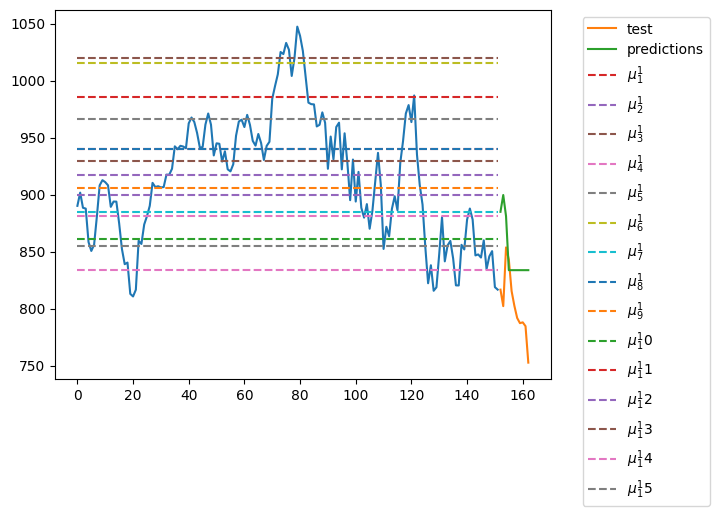

In [59]:
y_plot_test = [x + len(train_data) for x in list(range(len(test_data)))]
plt.plot(train_data)
plt.plot(y_plot_test, test_data, label = "test")
plt.plot(y_plot_test, predictions, label = "predictions")
# plt.plot(x = , y =predictions)

for i in range(len(means)):
    plt.plot(range(len(train_data)),
             model.means_[i, 0] * np.ones(len(train_data)),
             '--',
             label='$\mu^1_{}$'.format(i + 1))

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.tight_layout()
plt.show()

попробуем подобрать лучшие значения

In [61]:
from sklearn.metrics import mean_squared_error
best_mse =1e10
best_params = ['']*3
# Оценка качества прогноза на тестовой выборке
for n in range(1, 10):
    for n2 in [10, 100, 1000]:
        for n3 in ['diag', 'full' ,'spherical']:
        # Создание модели
            model = hmm.GaussianHMM(n_components=n, covariance_type=n3, n_iter=n2)

            # Обучение модели
            model.fit(train_data)
            means = model.means_
            # Прогнозирование значений на тестовой выборке
            predicted = model.predict(test_data)

            predictions = [means[int(state)] for state in predicted]

            mse = mean_squared_error(test_data, predictions)
            if mse < best_mse:
                best_mse = mse
                best_params[0], best_params[1], best_params[2] = n,n2,n3
            

print(best_params, "Mean Squared Error:", best_mse)


[8, 10, 'full'] Mean Squared Error: 2165.5019020402024


In [64]:
model = hmm.GaussianHMM(n_components=8, covariance_type='full', n_iter=10)

# Обучение модели
model.fit(train_data)
means = model.means_
# Прогнозирование значений на тестовой выборке
predicted = model.predict(test_data)

predictions = [means[int(state)] for state in predicted]

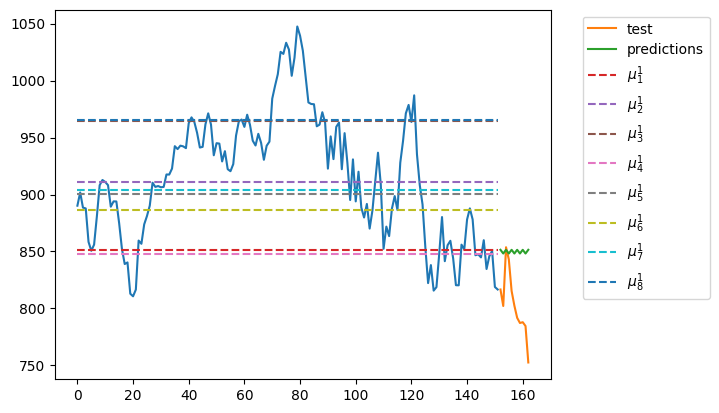

In [65]:
y_plot_test = [x + len(train_data) for x in list(range(len(test_data)))]
plt.plot(train_data)
plt.plot(y_plot_test, test_data, label = "test")
plt.plot(y_plot_test, predictions, label = "predictions")
# plt.plot(x = , y =predictions)

for i in range(len(means)):
    plt.plot(range(len(train_data)),
             model.means_[i, 0] * np.ones(len(train_data)),
             '--',
             label='$\mu^1_{}$'.format(i + 1))

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.tight_layout()
plt.show()